In [83]:
import pandas as pd

# Step 1: Load the original dataset
df = pd.read_csv("players_data-2024_2025.csv")

# Step 2: Keep identifying info separately (for later labeling/display)
player_info = df[['Player', 'Nation', 'Pos', 'Squad']].copy()

# Step 3: Create a new dataframe with just the numeric features for PCA
df_numeric = df.select_dtypes(include='number')

# Step 4: Drop high-missing-value columns
df_numeric = df_numeric.dropna(thresh=len(df_numeric) - 1000, axis=1)

# Step 5: Drop rows with any missing values
df_numeric = df_numeric.dropna()
player_info = player_info.loc[df_numeric.index].reset_index(drop=True)

# Step 6: Scale the numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Step 7: Create final scaled DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_numeric.columns)

In [84]:
scaled_df

,Rk,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,...,Crs_stats_misc,Int_stats_misc,TklW_stats_misc,PKwon,PKcon,OG,Recov,Won,Lost_stats_misc,Won%
0,-1.739525,2.636102,-2.747140,-0.920307,-0.542974,-0.529644,-0.527058,-0.730797,-0.814624,-0.882149,...,-0.792092,0.150621,-0.406706,-0.390143,-0.402037,-0.212074,-0.526936,-0.066205,-0.642094,1.306920
1,-1.735851,1.183930,-1.294623,0.170843,0.094856,-0.065257,-0.062691,0.738933,0.130510,0.584611,...,0.490098,0.692269,0.767976,-0.390143,-0.402037,-0.212074,0.202769,0.080115,-0.427114,1.033903
2,-1.733402,-0.510270,0.399981,1.261994,0.413771,0.771931,0.773170,-0.142905,-0.814624,-0.463075,...,1.294609,0.511720,1.607034,-0.390143,1.803198,-0.212074,1.005444,-0.066205,-0.265879,0.518893
3,-1.729727,-0.994327,1.126240,1.261994,1.795737,1.708446,1.713513,1.914716,0.130510,1.422761,...,-0.037863,-0.752126,-0.910141,-0.390143,-0.402037,-0.212074,0.470327,2.128581,2.905073,0.078342
4,-1.728503,-0.510270,0.399981,-0.556590,-0.436669,-0.456116,-0.457403,-0.436851,-0.342057,-0.463075,...,-0.012722,-0.661852,0.348447,-0.390143,-0.402037,-0.212074,-0.453965,-0.651481,-0.695839,-0.039552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,1.724038,0.457845,-0.326278,0.534560,1.157906,1.064753,1.063399,-0.730797,-0.814624,-0.882149,...,-0.766951,1.685291,0.600164,-0.390143,1.803198,-0.212074,0.543298,2.177354,3.066308,0.041112
1658,1.725263,-0.026212,0.157895,1.383233,1.795737,1.931610,1.934088,-0.142905,-0.342057,-0.253538,...,-0.490400,2.858862,1.774846,1.574759,-0.402037,-0.212074,1.832443,1.592078,0.540295,1.114567
1659,1.728937,-0.026212,-0.084191,0.655799,1.051601,1.116352,1.121445,-0.142905,2.965915,1.213223,...,1.370032,-0.571577,-0.406706,-0.390143,-0.402037,-0.212074,0.786533,-0.602708,-0.803328,0.549917
1660,1.730162,1.910016,-2.020881,-0.677829,-0.330364,-0.223922,-0.225219,0.444987,-0.342057,0.165537,...,-0.792092,-0.932676,-1.245764,-0.390143,-0.402037,-0.212074,-1.232317,5.445146,1.507704,1.741266


In [85]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1662 entries, 0 to 1661
Columns: 177 entries, Rk to Won%
dtypes: float64(177)
memory usage: 2.2 MB


In [86]:
scaled_df.describe()

,Rk,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,...,Crs_stats_misc,Int_stats_misc,TklW_stats_misc,PKwon,PKcon,OG,Recov,Won,Lost_stats_misc,Won%
count,1.662000e+03,1.662000e+03,1.662000e+03,1.662000e+03,1.662000e+03,1.662000e+03,1.662000e+03,1.662000e+03,1.662000e+03,1.662000e+03,...,1.662000e+03,1.662000e+03,1.662000e+03,1.662000e+03,1.662000e+03,1.662000e+03,1.662000e+03,1.662000e+03,1.662000e+03,1.662000e+03
mean,6.840363e-17,-3.591191e-16,-2.299752e-14,-1.496329e-17,8.764215e-17,2.885778e-17,-2.020045e-16,1.068807e-18,-2.137614e-18,8.550454e-18,...,2.992659e-17,-5.771557e-17,-8.550454e-18,7.267886e-17,-7.054125e-17,5.771557e-17,9.619261e-18,-8.630615e-17,-3.740824e-17,-9.191738e-17
std,1.000301e+00,1.000301e+00,1.000301e+00,1.000301e+00,1.000301e+00,1.000301e+00,1.000301e+00,1.000301e+00,1.000301e+00,1.000301e+00,...,1.000301e+00,1.000301e+00,1.000301e+00,1.000301e+00,1.000301e+00,1.000301e+00,1.000301e+00,1.000301e+00,1.000301e+00,1.000301e+00
min,-1.739525e+00,-2.204470e+00,-3.715485e+00,-2.617653e+00,-1.606025e+00,-1.771881e+00,-1.769240e+00,-7.307968e-01,-8.146243e-01,-8.821493e-01,...,-7.920923e-01,-1.113225e+00,-1.329670e+00,-3.901429e-01,-4.020375e-01,-2.120740e-01,-1.499876e+00,-9.928917e-01,-1.179543e+00,-2.757315e+00
25%,-8.635303e-01,-7.522982e-01,-5.683638e-01,-7.990684e-01,-8.618896e-01,-8.321411e-01,-8.288967e-01,-7.307968e-01,-8.146243e-01,-6.726121e-01,...,-6.663873e-01,-7.521263e-01,-8.262352e-01,-3.901429e-01,-4.020375e-01,-2.120740e-01,-8.188178e-01,-7.002536e-01,-6.958386e-01,-6.569432e-01
50%,-1.141764e-02,-2.621248e-02,1.578950e-01,1.708434e-01,-1.144922e-02,-6.977146e-02,-7.430014e-02,-4.368510e-01,-3.420569e-01,-2.535376e-01,...,-4.149775e-01,-3.007527e-01,-2.388944e-01,-3.901429e-01,-4.020375e-01,-2.120740e-01,-1.620835e-01,-3.100696e-01,-2.658790e-01,4.731732e-02
75%,8.722320e-01,6.998733e-01,6.420675e-01,8.982772e-01,8.389911e-01,8.293346e-01,8.312158e-01,1.510408e-01,6.030779e-01,3.750742e-01,...,2.638291e-01,5.117196e-01,6.001640e-01,-3.901429e-01,-4.020375e-01,-2.120740e-01,6.649153e-01,3.239796e-01,3.253154e-01,6.926309e-01
max,1.731387e+00,3.604216e+00,2.336671e+00,1.625711e+00,2.114652e+00,2.138005e+00,2.143053e+00,6.911796e+00,6.273887e+00,6.451655e+00,...,5.769705e+00,5.296279e+00,5.382797e+00,1.139927e+01,8.418904e+00,8.384682e+00,4.532351e+00,7.005882e+00,6.237259e+00,3.447624e+00


Explained variance ratio per component:
 [0.33044522 0.15298658 0.06038714 0.05516809 0.05100245 0.0399443
 0.02365726 0.0198922  0.01855422 0.0162911  0.01489094 0.01340327
 0.01084911 0.00984511 0.00888613 0.00837652 0.0076754  0.00750098
 0.00695058 0.00610892 0.0058788  0.00553362 0.00543783 0.00523972
 0.00510247 0.00487717 0.00473538 0.0045549 ]
Cumulative variance explained:
 [0.33044522 0.4834318  0.54381895 0.59898704 0.64998949 0.68993379
 0.71359105 0.73348324 0.75203746 0.76832855 0.78321949 0.79662276
 0.80747188 0.81731699 0.82620311 0.83457963 0.84225504 0.84975602
 0.8567066  0.86281551 0.86869431 0.87422793 0.87966576 0.88490548
 0.89000795 0.89488512 0.8996205  0.90417539]


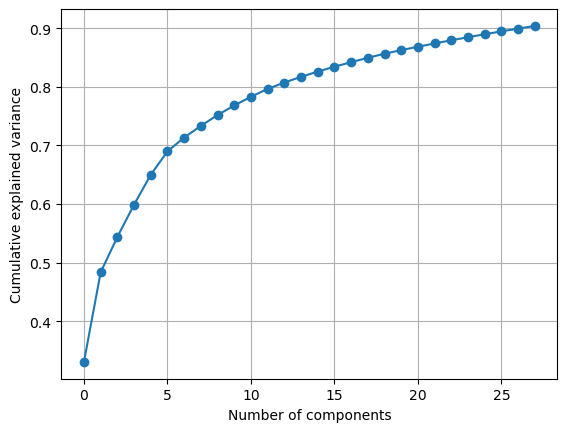

In [87]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Step 8: Instantiate PCA
# – you can pick n_components as an int (e.g. 2 for a 2-D projection)
#   or a float between 0 and 1 to explain that fraction of variance
pca = PCA(n_components=0.90)  # keep enough PCs to explain 90% of variance

# Step 9: Fit PCA and transform your scaled data
principal_data = pca.fit_transform(scaled_df)

# Step 10: Wrap into a DataFrame (and re-attach your player info)
pc_cols = [f"PC{i+1}" for i in range(pca.n_components_)]
principal_df = pd.DataFrame(principal_data, columns=pc_cols)
final_df = pd.concat([player_info, principal_df], axis=1)

# Step 11 (optional): Examine explained variance
print("Explained variance ratio per component:\n", pca.explained_variance_ratio_)
print("Cumulative variance explained:\n", np.cumsum(pca.explained_variance_ratio_))

# Step 12 (optional): Plot cumulative explained variance to choose components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.grid(True)
plt.show()

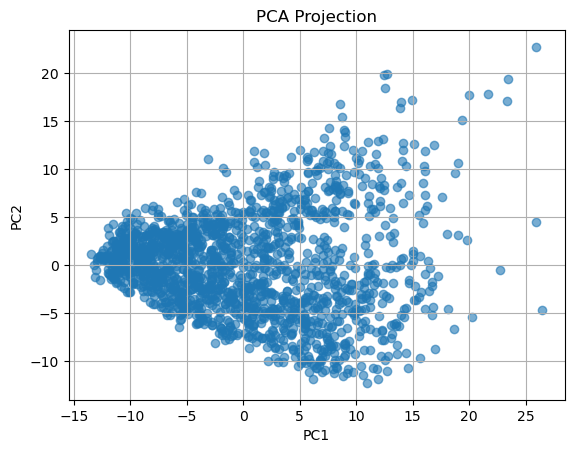

In [88]:
plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.grid(True)
plt.show()

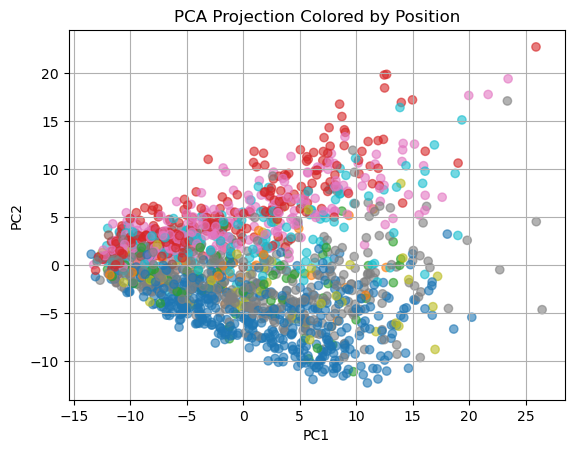

In [89]:
plt.scatter(principal_df['PC1'], principal_df['PC2'], 
            c=player_info['Pos'].astype('category').cat.codes,
            cmap='tab10', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection Colored by Position')
plt.grid(True)
plt.show()

In [90]:
loadings = pd.DataFrame(pca.components_[:2].T, 
                        index=scaled_df.columns, 
                        columns=['PC1', 'PC2'])
print(loadings.sort_values('PC1', ascending=False).head(10))
print(loadings.sort_values('PC2', ascending=False).head(10))

                              PC1       PC2
Min%                     0.124382 -0.022111
Min                      0.124356 -0.022782
Min_stats_playing_time   0.124356 -0.022782
90s_stats_shooting       0.124353 -0.022780
90s                      0.124353 -0.022780
90s_stats_defense        0.124353 -0.022780
90s_stats_possession     0.124353 -0.022780
90s_stats_passing_types  0.124353 -0.022780
90s_stats_misc           0.124353 -0.022780
90s_stats_playing_time   0.124353 -0.022780
                        PC1       PC2
xG+xAG            -0.002709  0.154295
Sh/90             -0.017521  0.146069
SoT/90            -0.019402  0.143422
SoT                0.063372  0.141977
npxG+xAG           0.077037  0.141123
G+A-PK             0.011458  0.140026
xG                 0.052462  0.139675
xG_stats_shooting  0.052462  0.139675
Att Pen            0.070560  0.139350
npxG               0.052218  0.139324


In [91]:
# Assuming you already have this:
principal_df  # this contains PC1, PC2, ..., etc.

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
0,-5.693309,-6.486829,-7.339931,0.124711,-5.597992,-4.021979,-1.212183,2.169302,-1.612303,0.935086,...,-2.856180,0.788796,0.098977,0.628973,-0.144426,-0.631523,0.262875,0.617094,-1.210781,-2.016697
1,1.560277,1.270464,-3.062541,0.246532,-5.539182,-0.427003,-2.968178,0.451668,3.098381,-0.888695,...,-0.980861,-0.562091,-0.513396,-0.398351,-0.981877,-0.470757,-0.220323,-0.291198,-0.976804,0.725390
2,5.156517,-3.993643,3.473555,0.137079,-4.286953,-3.361083,-1.654422,2.324665,2.658510,1.624272,...,0.015677,-0.680841,-0.121333,-1.517626,-0.218580,0.934999,0.894773,-0.176950,0.535729,0.478642
3,7.681496,8.664444,2.580689,-7.641406,-4.016472,-3.733573,-0.371706,2.333921,-3.047121,0.434941,...,0.831919,-0.394573,0.281554,0.668026,-1.182878,0.109168,1.051800,-0.885110,-1.537789,0.941600
4,-2.894724,-2.046562,2.297960,1.023113,-5.084821,1.016711,-0.487920,1.149302,0.960062,0.374517,...,-1.575284,-0.165073,0.106666,0.100819,-0.040374,-0.242162,0.083559,0.201851,-0.706283,-0.052232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,5.407187,-9.897459,-1.944925,-2.863495,4.969755,1.994698,1.290507,-0.878814,-3.102484,0.183881,...,1.992016,-0.231740,0.625700,-0.442998,-0.638043,-0.142906,0.832827,-0.508294,1.938977,-1.372034
1658,12.483307,-7.791972,0.371181,-2.921115,5.253931,1.640236,-0.472141,-2.013061,0.202547,0.947445,...,1.021546,-0.651205,-0.651986,-0.925954,0.083015,-1.411382,-0.248676,-0.542796,0.300887,-0.962528
1659,13.021855,5.952749,0.178171,7.225321,3.819875,5.072565,0.791886,-1.922155,-4.951585,-0.328274,...,2.239658,1.571273,-0.223691,1.460012,-0.374758,0.676907,2.056962,0.541710,-2.214768,0.578086
1660,-5.403976,0.740702,-8.683827,-2.550472,4.693343,-1.466537,-0.567675,1.800279,0.082499,-0.923636,...,3.040855,0.371424,-0.741771,0.855738,-1.294633,-1.456341,2.376919,-1.427444,0.361709,-0.396498


In [92]:
from sklearn.cluster import KMeans

# Try different numbers of clusters — start with 5
kmeans = KMeans(n_clusters=5, random_state=42)
principal_df['Cluster'] = kmeans.fit_predict(principal_df)

In [93]:
kmeans = KMeans(n_clusters=5, random_state=42)
principal_df['Cluster'] = kmeans.fit_predict(principal_df[['PC1', 'PC2']])

In [94]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


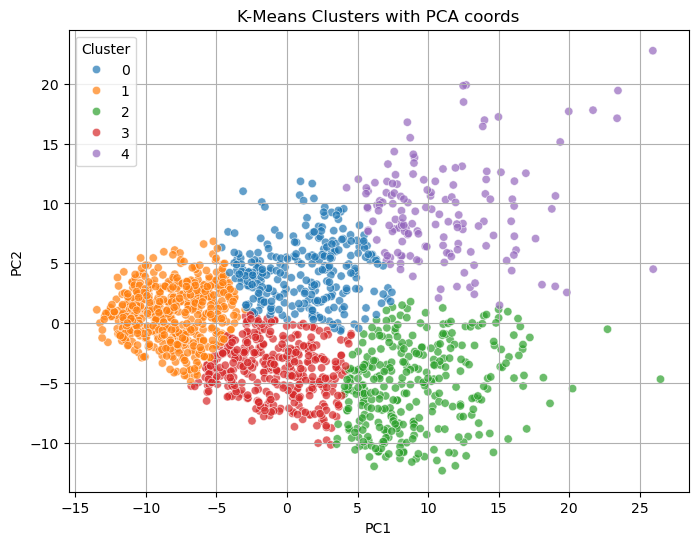

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', alpha=0.7)
plt.title("K-Means Clusters with PCA coords")
plt.grid(True)
plt.show()

In [ ]:
clustered_df = pd.concat([player_info, principal_df], axis=1)

In [ ]:
clustered_df.groupby('Cluster')['Pos'].value_counts(normalize=True)

Cluster  Pos  
0        FW,MF    0.340580
         FW       0.275362
         MF,FW    0.199275
         MF       0.090580
         DF,MF    0.025362
         MF,DF    0.025362
         DF       0.014493
         DF,FW    0.014493
         FW,DF    0.014493
1        FW       0.224820
         FW,MF    0.201439
         MF       0.196043
         MF,FW    0.145683
         DF       0.136691
         DF,MF    0.039568
         MF,DF    0.025180
         DF,FW    0.017986
         FW,DF    0.012590
2        DF       0.539185
         MF       0.313480
         MF,DF    0.053292
         DF,MF    0.047022
         MF,FW    0.028213
         DF,FW    0.018809
3        DF       0.502762
         MF       0.331492
         DF,MF    0.066298
         MF,DF    0.046961
         DF,FW    0.024862
         MF,FW    0.019337
         FW,MF    0.005525
         FW,DF    0.002762
4        FW       0.335570
         FW,MF    0.322148
         MF,FW    0.181208
         MF       0.120805
         DF,F

In [ ]:
# Only keep numeric columns for aggregation
numeric_cols = clustered_df.select_dtypes(include='number').columns

# Now group and take the mean of only numeric features
cluster_profiles = clustered_df[numeric_cols].groupby(clustered_df['Cluster']).mean()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Build matrix of players in PCA space
pca_matrix = principal_df.drop(columns='Cluster').values  # just PC1, PC2, ..., not cluster

# Cosine similarity (or use pairwise_distances with metric='euclidean' if you prefer)
similarity_matrix = cosine_similarity(pca_matrix)

# Attach player names for easy lookup
player_names = player_info['Player'].reset_index(drop=True)

In [ ]:
def find_similar_players(target_name, top_n=5):
    try:
        idx = player_names[player_names == target_name].index[0]
    except IndexError:
        return f"Player '{target_name}' not found."

    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    top_similar = [player_names[i] for i, score in sim_scores[1:top_n+1]]  # skip self (idx 0)
    return top_similar

In [ ]:
find_similar_players("Kevin De Bruyne", top_n=10) 

['Antoine Griezmann',
 'Federico Dimarco',
 'Vincenzo Grifo',
 'Álex Berenguer',
 'Alex Baena',
 'Marvin Ducksch',
 'Luka Modrić',
 'Rayan Cherki',
 'Sergi Darder',
 'Álex Grimaldo']